In [108]:
from sklearn.neural_network import MLPClassifier
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from patsy import dmatrices
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score

In [3]:
df = pd.read_csv('final_proj_clean.csv')
df = df.drop(['Unnamed: 0'], axis = 1)
df = df.replace(True,1)
df = df.replace(False,0)
df['championPlayed'] = df['championPlayed'].astype('category')
df['firstBlood'] = df['firstBlood'].astype('category')
df['firstTower'] = df['firstTower'].astype('category')
df['firstInhibitor'] = df['firstInhibitor'].astype('category')
df['firstBaron'] = df['firstBaron'].astype('category')
df['firstDragon'] = df['firstDragon'].astype('category')
df['firstRiftHerald'] = df['firstRiftHerald'].astype('category')
df['playerId'] =df['playerId'].astype('category')



In [4]:
df

,winloss,playerId,championPlayed,kills,deaths,assists,goldEarned,inhibitorKills,turretKills,visionScore,...,totalDamageTaken,longestTimeSpentLiving,totalDamageDealtToChampions,totalTimeCrowdControlDealt,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald
0,1,omKM0-rENPoC4ZDmjA-6oFSKysuXuyzET86KbCTtIFtFwQ,134,9,2,2,10401,0,1,5,...,10006,794,15861,145,1.0,1.0,0.0,0.0,1.0,1.0
1,0,omKM0-rENPoC4ZDmjA-6oFSKysuXuyzET86KbCTtIFtFwQ,134,7,10,11,12636,1,0,27,...,26612,486,31334,274,1.0,1.0,1.0,1.0,0.0,1.0
2,0,omKM0-rENPoC4ZDmjA-6oFSKysuXuyzET86KbCTtIFtFwQ,8,9,12,16,16815,0,4,25,...,51215,404,54000,172,1.0,1.0,1.0,1.0,1.0,1.0
3,0,omKM0-rENPoC4ZDmjA-6oFSKysuXuyzET86KbCTtIFtFwQ,110,2,4,3,9147,0,0,11,...,11614,442,8694,233,0.0,0.0,0.0,0.0,1.0,0.0
4,1,omKM0-rENPoC4ZDmjA-6oFSKysuXuyzET86KbCTtIFtFwQ,69,6,9,8,12246,0,0,32,...,24436,714,20481,171,1.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11314,1,Rii5E_AEdlpQMiPrpCpZZzTl2HAon783Wb2sARbN8I2DhT...,119,16,4,6,15622,0,4,13,...,14140,713,23960,87,0.0,1.0,1.0,1.0,1.0,1.0
11315,0,Rii5E_AEdlpQMiPrpCpZZzTl2HAon783Wb2sARbN8I2DhT...,29,4,6,4,8064,0,0,6,...,13346,338,10094,180,0.0,0.0,0.0,0.0,0.0,0.0
11316,0,Rii5E_AEdlpQMiPrpCpZZzTl2HAon783Wb2sARbN8I2DhT...,29,0,0,0,845,0,0,1,...,654,0,588,0,0.0,0.0,0.0,0.0,0.0,0.0
11317,1,Rii5E_AEdlpQMiPrpCpZZzTl2HAon783Wb2sARbN8I2DhT...,29,15,1,2,14202,0,2,17,...,8973,1184,24757,280,1.0,1.0,1.0,1.0,1.0,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11319 entries, 0 to 11318
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   winloss                      11319 non-null  int64   
 1   playerId                     11319 non-null  category
 2   championPlayed               11319 non-null  category
 3   kills                        11319 non-null  int64   
 4   deaths                       11319 non-null  int64   
 5   assists                      11319 non-null  int64   
 6   goldEarned                   11319 non-null  int64   
 7   inhibitorKills               11319 non-null  int64   
 8   turretKills                  11319 non-null  int64   
 9   visionScore                  11319 non-null  int64   
 10  totalDamageDealt             11319 non-null  int64   
 11  totalDamageTaken             11319 non-null  int64   
 12  longestTimeSpentLiving       11319 non-null  int64   
 13  t

<AxesSubplot:>

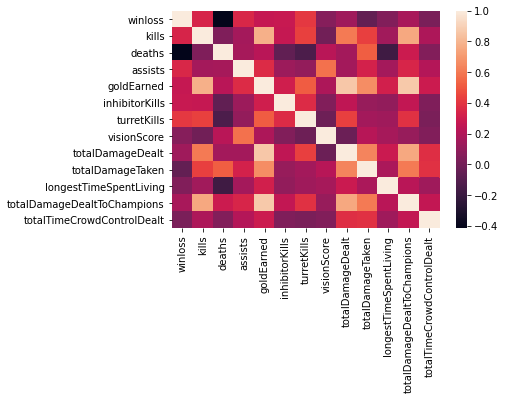

In [6]:
sns.heatmap(data=df.corr())

In [7]:
df.winloss.value_counts(normalize=True)

1    0.534588
0    0.465412
Name: winloss, dtype: float64

#### As recommended, I will fit models on a player by player basis

In [8]:
players_separated_list = [pd.DataFrame(y) for x, y in df.groupby('playerId', as_index=False)]

In [57]:
def calc_pca_contrib(load_mat):
    # square each element in the loadings matrix
    load_mat_sq = load_mat ** 2
    # sum the square loadings for each PC
    sum_load_squares = load_mat_sq.sum(axis=0)
    # divide the square loadings by the sum of the squared loadings per PC
    contrib_mat = load_mat_sq / sum_load_squares
    
    return(contrib_mat)

In [109]:
simple_summary_dictionary = {}
simple_classification_dictionary = {}

interactions_summary_dictionary = {}
interactions_classification_dictionary = {}

three_summary_dictionary = {}
three_classification_dictionary = {}

CVsimple_summary_dictionary = {}
CVsimple_classification_dictionary = {}

auc_scores ={}

pipeline_summary_dictionary = {}
pipeline_classification_dictionary = {}

PCAcoefficients = {}

In [110]:


simple_additive = 'winloss ~ C(championPlayed) + kills + deaths + assists + goldEarned + inhibitorKills + turretKills + visionScore' \
                  '+ totalDamageDealt + totalDamageTaken + longestTimeSpentLiving + totalDamageDealtToChampions + totalTimeCrowdControlDealt' \
                  '+ C(firstBlood) + C(firstTower) + C(firstInhibitor) + C(firstBaron) + C(firstDragon) + C(firstRiftHerald)'

simple_interact = 'winloss ~ (C(championPlayed) + kills + deaths + assists + goldEarned + inhibitorKills + turretKills + visionScore' \
                  '+ totalDamageDealt + totalDamageTaken + longestTimeSpentLiving + totalDamageDealtToChampions + totalTimeCrowdControlDealt' \
                  '+ C(firstBlood) + C(firstTower) + C(firstInhibitor) + C(firstBaron) + C(firstDragon) + C(firstRiftHerald))**2 '

#taking log of applicable variables because variables seem to be related in many ways
three_interact =  'winloss ~ (C(championPlayed) + kills + deaths + assists + goldEarned + inhibitorKills + turretKills + visionScore' \
                  '+ totalDamageDealt + totalDamageTaken + longestTimeSpentLiving + totalDamageDealtToChampions + totalTimeCrowdControlDealt' \
                  '+ C(firstBlood) + C(firstTower) + C(firstInhibitor) + C(firstBaron) + C(firstDragon) + C(firstRiftHerald))**3'

columns_to_standardize = ['kills','deaths','assists','goldEarned','inhibitorKills','turretKills','visionScore','totalDamageDealt',
               'totalDamageTaken','longestTimeSpentLiving','totalDamageDealtToChampions','totalTimeCrowdControlDealt']

columns_to_np = ['championPlayed','kills','deaths','assists','goldEarned','inhibitorKills','turretKills','visionScore','totalDamageDealt',
               'totalDamageTaken','longestTimeSpentLiving','totalDamageDealtToChampions','totalTimeCrowdControlDealt',
                'firstBlood','firstTower','firstInhibitor','firstBaron','firstDragon','firstRiftHerald']

C_list = np.exp(np.linspace(-6, 6, num=11))

def SimpleModelFit(instance, player_data, formula_used, summary_dict, class_dict, num_cols):
    #set up to standardize (I have to or else the fitting fails to converge)
    temp_player_data = player_data.sample(frac=1).copy()
    standard = StandardScaler()
    temp_player_data[num_cols] = standard.fit_transform(temp_player_data[num_cols])
    
    y_temp, X_temp = dmatrices(formula_used+' -1', temp_player_data)
    temp_fit = LogisticRegression(max_iter=10000,fit_intercept=False).fit(X_temp[125:],y_temp[125:].ravel())
    
    #add summary to a dictionary
    summary_dict['player_'+str(instance)] = temp_fit.score(X_temp[:125],y_temp[:125].ravel())

    temp_player_data['pred_prob'] = temp_fit.predict_proba(X_temp).tolist()
    temp_player_data['pred_class'] = temp_fit.predict(X_temp).tolist()
    
    #add the dataframe with probabilities and classification to dictionary
    class_dict['player'+str(instance)] = temp_player_data

    
    

#this function is like SimpleModelFit, but uses CV too
def SimpleCVFit(instance, player_data, formula_used, summary_dict, class_dict, num_cols):
    #set up to standardize (I have to or else the fitting fails to converge)
    temp_player_data = player_data.sample(frac=1).copy()
    standard = StandardScaler()
    temp_player_data[num_cols] = standard.fit_transform(temp_player_data[num_cols])
    
    y_temp, X_temp = dmatrices(formula_used+' -1', temp_player_data)
    temp_fit = LogisticRegressionCV(l1_ratios=[0.0,0.5,1.0],solver='saga',penalty='elasticnet',cv=3, max_iter=10000, fit_intercept=False,n_jobs=2).fit(X_temp,y_temp.ravel())
    
    #add summary to a dictionary
    summary_dict['player_'+str(instance)] = temp_fit.score(X_temp,y_temp.ravel())

    temp_player_data['pred_prob'] = temp_fit.predict_proba(X_temp).tolist()
    temp_player_data['pred_class'] = temp_fit.predict(X_temp).tolist()
    
    #add the dataframe with probabilities and classification to dictionary
    class_dict['player'+str(instance)] = temp_player_data
      

        
#-------------------------------------------------------------------------------------------------------------------------------------------        

#this function is like SimpleModelFit, but uses CV too
def PCA_CVFit(instance, player_data, formula_used, summary_dict, class_dict, num_cols):
    #set up to standardize (I have to or else the fitting fails to converge)
    temp_player_data = player_data.sample(frac=1).copy()
    standard = StandardScaler()
    temp_player_data[num_cols] = standard.fit_transform(temp_player_data[num_cols])
    pca_fit = PCA(n_components=12)
    
    y_temp, X_temp = dmatrices(formula_used+' -1', temp_player_data)
    X_temp = pca_fit.fit_transform(X_temp)
    temp_fit = LogisticRegressionCV(Cs=C_list ,l1_ratios=[0.0,0.5,1.0],solver='saga',penalty='elasticnet',random_state=101,cv=10, max_iter=10000, fit_intercept=False,n_jobs=-1).fit(X_temp,y_temp.ravel())
    
    #add summary to a dictionary
    summary_dict['player_'+str(instance)] = temp_fit.score(X_temp,y_temp.ravel())

    temp_player_data['pred_prob'] = temp_fit.predict_proba(X_temp).tolist()
    temp_player_data['pred_class'] = temp_fit.predict(X_temp).tolist()
    
    #add the dataframe with probabilities and classification to dictionary
    class_dict['player_'+str(instance)] = temp_player_data
    PCAcoefficients['player_'+str(instance)] = temp_fit.coef_
    print('player_'+str(instance)+' best fit l1 ratio = '+str(temp_fit.l1_ratio_))
    auc_scores['player_'+str(instance)] = roc_auc_score(y_temp, temp_fit.predict_proba(X_temp)[:, 1])
    









#this function will handle the fitting, etc.for more complex models
def PipelineModelTuning(instance, player_data, summary_dict, class_dict, num_cols):
    #bring in data and such
    temp_player_data = player_data.sample(frac=1).copy()
    scaler = StandardScaler()
    temp_player_data[num_cols] = scaler.fit_transform(temp_player_data[num_cols])
    
    y_temp = temp_player_data['winloss'].to_numpy()
    X_temp = temp_player_data[columns_to_np].to_numpy()
    y_other, X_other = dmatrices(simple_interact+' - 1', temp_player_data)
    print(X_other.shape)

    skf5 = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)
    temp_fit = LogisticRegression(penalty='elasticnet', solver='saga', random_state=101, max_iter=10001,fit_intercept=False,n_jobs=-1)
    interaction_maker = PolynomialFeatures(degree=2, interaction_only=True)
    temp_pca = PCA(n_components=12)

    
    pipeline_model_workflow = Pipeline(steps=[('pca', temp_pca),
                                        ('make_pairs', interaction_maker),
                                        ('enet', temp_fit)])
    
    pipeline_interact_grid = {'enet__C': np.exp(np.linspace(-6, 6, num=11)),
                             'enet__l1_ratio': np.linspace(0, 1, num=3)}
    
    pipeline_interact_search = GridSearchCV(pipeline_model_workflow, pipeline_interact_grid, cv=skf5)
    
    
    pipeline_interact_search_results = pipeline_interact_search.fit(X_temp, y_temp)
    print('I made it past the pipeline!')
    
    pipeline_summary_dictionary['player_'+str(instance)] = pipeline_interact_search_results.best_score_
    
    interaction_table = pipeline_interact_search_results.best_estimator_.named_steps['make_pairs'].reshape(-1,1)
    
    temp_player_data['pred_prob'] = pipeline_interact_search_results.best_estimator_.named_steps['enet'].predict_proba(interaction_table).tolist()
    temp_player_data['pred_class'] = pipeline_interact_search_results.best_estimator_.named_steps['enet'].predict(interaction_table).tolist()
    
    class_dict['player_'+str(instance)] = temp_player_data
    

    


In [111]:
tracker = 1
#for every player's subset of data in the list
for different_player in players_separated_list:
    #need to lump
    series = pd.value_counts(different_player.championPlayed)
    mask = (series/series.sum() * 100).lt(10)
    different_player['championPlayed'] = np.where(different_player['championPlayed'].isin(series[mask].index),'Other',different_player['championPlayed'])
    different_player['championPlayed'] = different_player['championPlayed'].astype('category')
    different_player['championPlayed'] = different_player['championPlayed'].replace('Other','0')
    
    #simple model stuff
    #SimpleModelFit(tracker,different_player,simple_additive,simple_summary_dictionary,simple_classification_dictionary,columns_to_standardize)
    
    #trying out interacting pair features
    #SimpleModelFit(tracker,different_player,simple_interact,interactions_summary_dictionary,interactions_classification_dictionary,columns_to_standardize)
    
    #trying out CV on a more complex model
    PCA_CVFit(tracker,different_player,simple_interact,CVsimple_summary_dictionary,CVsimple_classification_dictionary,columns_to_standardize)
    
    #PIPELINE
    
    #trying out the three interactions
    #SimpleModelFit(tracker,different_player,three_interact,three_summary_dictionary,three_classification_dictionary,columns_to_standardize)
    
    #do DataPipeline (for each fold: standardize, PCA?, polynomialFeatures, fit_model/potentially penalize)
    #store summaries
    #store scores
    
    tracker = tracker + 1

player_1 best fit l1 ratio = [0.]
player_2 best fit l1 ratio = [0.]
player_3 best fit l1 ratio = [0.5]
player_4 best fit l1 ratio = [0.]
player_5 best fit l1 ratio = [0.]
player_6 best fit l1 ratio = [0.]
player_7 best fit l1 ratio = [1.]
player_8 best fit l1 ratio = [0.]
player_9 best fit l1 ratio = [0.]
player_10 best fit l1 ratio = [0.5]
player_11 best fit l1 ratio = [0.]
player_12 best fit l1 ratio = [0.]
player_13 best fit l1 ratio = [0.]
player_14 best fit l1 ratio = [0.]
player_15 best fit l1 ratio = [0.5]
player_16 best fit l1 ratio = [0.5]
player_17 best fit l1 ratio = [0.5]
player_18 best fit l1 ratio = [0.]
player_19 best fit l1 ratio = [1.]
player_20 best fit l1 ratio = [1.]
player_21 best fit l1 ratio = [1.]
player_22 best fit l1 ratio = [0.5]
player_23 best fit l1 ratio = [0.]
player_24 best fit l1 ratio = [0.]
player_25 best fit l1 ratio = [0.5]


When we fit the model on the PCA data set, there seems to be more of a mixed bag in terms of the best penalization parameter

In [67]:
CVsimple_summary_dictionary

{'player_1': 0.866,
 'player_2': 0.852,
 'player_3': 0.842,
 'player_4': 0.854,
 'player_5': 0.856,
 'player_6': 0.8446601941747572,
 'player_7': 0.806,
 'player_8': 0.848,
 'player_9': 0.8791946308724832,
 'player_10': 0.8741721854304636,
 'player_11': 0.872,
 'player_12': 0.8406593406593407,
 'player_13': 0.856,
 'player_14': 0.862,
 'player_15': 0.836,
 'player_16': 0.86,
 'player_17': 0.882,
 'player_18': 0.842,
 'player_19': 0.7392290249433107,
 'player_20': 0.85546875,
 'player_21': 0.842,
 'player_22': 0.87,
 'player_23': 0.83,
 'player_24': 0.804,
 'player_25': 0.85}

In [69]:
coef_list = []
for v in PCAcoefficients.values():
    coef_list.append(v[0])

In [71]:
coef_frame = pd.DataFrame(coef_list,index=PCAcoefficients.keys())

In [72]:
coef_frame

,0,1,2,3,4,5,6,7,8,9,10,11
player_1,0.059105,0.230979,-0.194193,-0.212663,0.708627,0.294871,0.131535,0.164215,0.228008,0.328093,0.345195,0.145455
player_2,0.078303,0.222623,0.147904,0.605105,0.349320,0.118037,0.310572,-0.258952,-0.127637,-0.152905,-0.162214,-0.478967
player_3,0.147301,0.222694,-0.146007,-0.089517,-0.025301,-0.074499,0.145525,0.109628,1.110735,0.194908,-0.593038,-0.031539
player_4,0.013570,0.244700,-0.134892,-0.017614,-0.018152,-0.300719,-0.629890,0.178235,0.354621,0.257124,-0.104646,-0.198971
player_5,0.040436,0.215192,-0.008252,0.185714,-0.123201,-0.681657,-0.125708,-0.036449,0.770951,-0.245962,0.401106,0.666761
player_6,0.029604,0.076475,0.051653,0.001040,-0.100774,-0.690515,-0.435555,-0.159940,-0.296086,-0.323001,0.453871,0.271126
player_7,0.059740,-0.123291,0.015794,0.072773,-0.029653,0.000000,-0.472547,0.153974,0.000000,0.000000,-0.366367,0.000000
player_8,0.071947,0.145502,0.046608,-0.126446,-0.100324,-0.022531,0.246050,0.926996,0.412503,0.000000,0.467643,0.000000
player_9,0.132238,0.121049,0.009730,-0.020686,-0.009772,-0.006341,-0.581219,-0.639185,-0.382952,0.161888,-0.050364,0.074473
player_10,0.349379,-0.249318,-0.257991,0.131381,0.124914,-0.029309,0.316337,-0.633265,0.333140,-0.420829,-0.046319,-0.685905


**PC2 looks like it is important across all players, could mean the performance metrics that contribute to it are generally are more of a deciding factor**

### Neural Network and other Models

#### Player 1 with PCA

In [92]:
#need to lump
series = pd.value_counts(players_separated_list[0].championPlayed)
mask = (series/series.sum() * 100).lt(10)
players_separated_list[0].championPlayed = np.where(players_separated_list[0].championPlayed.isin(series[mask].index),'Other',players_separated_list[0].championPlayed)
players_separated_list[0].championPlayed = players_separated_list[0].championPlayed.astype('category')
players_separated_list[0].championPlayed = players_separated_list[0].championPlayed.replace('Other','0')
players_separated_list[0] = players_separated_list[0].drop(['playerId'],axis=1)
    
skf5 = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)
yp1, Xp1 = dmatrices(simple_additive+' -1', players_separated_list[0])


nn1_workflow = Pipeline(steps=[('std_scale', StandardScaler()), 
                                           ('pca', PCA()), 
                                           ('nnet', MLPClassifier(activation='relu',
                                                                    solver='sgd',
                                                                      batch_size=32,
                                                                      max_iter=2001))])

nn1_tune_grid = {'pca__n_components': [10, 20],
                             'nnet__hidden_layer_sizes': [20, 30],
                             'nnet__alpha': np.exp(np.linspace(-9, -1, 11))}

nn1_search = GridSearchCV( nn1_workflow, nn1_tune_grid, cv=skf5)

nn1_search_results = nn1_search.fit(Xp1, yp1.ravel())

print(nn1_search_results.best_score_)

print(nn1_search_results.best_params_)



0.938
{'nnet__alpha': 0.0742735782143339, 'nnet__hidden_layer_sizes': 20, 'pca__n_components': 20}


#### Player 1 no PCA

In [93]:
yp2, Xp2 = dmatrices(simple_additive+' -1', players_separated_list[0])


nn2_workflow = Pipeline(steps=[('std_scale', StandardScaler()), 
                                           ('nnet', MLPClassifier(activation='relu',
                                                                    solver='sgd',
                                                                      batch_size=32,
                                                                      max_iter=2001))])

nn2_tune_grid = { 'nnet__hidden_layer_sizes': [20, 30],
                             'nnet__alpha': np.exp(np.linspace(-9, -1, 11))}

nn2_search = GridSearchCV( nn2_workflow, nn2_tune_grid, cv=skf5)

nn2_search_results = nn2_search.fit(Xp2, yp2.ravel())

print(nn2_search_results.best_score_)

print(nn2_search_results.best_params_)

0.942
{'nnet__alpha': 0.16529888822158656, 'nnet__hidden_layer_sizes': 20}


#### Player 2 with PCA

In [94]:
#need to lump
series = pd.value_counts(players_separated_list[1].championPlayed)
mask = (series/series.sum() * 100).lt(10)
players_separated_list[1].championPlayed = np.where(players_separated_list[1].championPlayed.isin(series[mask].index),'Other',players_separated_list[1].championPlayed)
players_separated_list[1].championPlayed = players_separated_list[1].championPlayed.astype('category')
players_separated_list[1].championPlayed = players_separated_list[1].championPlayed.replace('Other','0')
players_separated_list[1] = players_separated_list[1].drop(['playerId'],axis=1)

skf5 = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)
yp3, Xp3 = dmatrices(simple_additive+' -1', players_separated_list[1])


nn3_workflow = Pipeline(steps=[('std_scale', StandardScaler()), 
                                           ('pca', PCA()), 
                                           ('nnet', MLPClassifier(activation='relu',
                                                                    solver='sgd',
                                                                      batch_size=32,
                                                                      max_iter=2001))])

nn3_tune_grid = {'pca__n_components': [10, 20],
                             'nnet__hidden_layer_sizes': [20, 30],
                             'nnet__alpha': np.exp(np.linspace(-9, -1, 11))}

nn3_search = GridSearchCV( nn3_workflow, nn3_tune_grid, cv=skf5)

nn3_search_results = nn3_search.fit(Xp3, yp3.ravel())

print(nn3_search_results.best_score_)

print(nn3_search_results.best_params_)

0.938
{'nnet__alpha': 0.0333732699603261, 'nnet__hidden_layer_sizes': 30, 'pca__n_components': 20}


#### Player 2 no PCA

In [95]:
yp4, Xp4 = dmatrices(simple_additive+' -1', players_separated_list[1])


nn4_workflow = Pipeline(steps=[('std_scale', StandardScaler()), 
                                           ('nnet', MLPClassifier(activation='relu',
                                                                    solver='sgd',
                                                                      batch_size=32,
                                                                      max_iter=2001))])

nn4_tune_grid = { 'nnet__hidden_layer_sizes': [20, 30],
                             'nnet__alpha': np.exp(np.linspace(-9, -1, 11))}

nn4_search = GridSearchCV( nn4_workflow, nn4_tune_grid, cv=skf5)

nn4_search_results = nn4_search.fit(Xp4, yp4.ravel())

print(nn4_search_results.best_score_)

print(nn4_search_results.best_params_)

0.942
{'nnet__alpha': 0.00012340980408667956, 'nnet__hidden_layer_sizes': 30}


Accuracy Scores aren't bad at all for this data

No PCA seems to perform better

### Random Forest

##### Player 1

In [123]:
rf1_workflow = Pipeline(steps = [('rf', RandomForestClassifier(n_estimators=500))])

rf1_tune_grid = {'rf__max_features': [2, 4, 6, 8, 12]}

rf1_search = GridSearchCV(rf1_workflow, rf1_tune_grid, cv=skf5)

rf1_search_results = rf1_search.fit(Xp1, yp1.ravel())

print(rf1_search_results.best_score_)

print(rf1_search_results.best_params_)

0.9279999999999999
{'rf__max_features': 6}


##### Player 2


In [124]:
rf2_workflow = Pipeline(steps = [('rf', RandomForestClassifier(n_estimators=500))])

#less champions played categories, so lower max features
rf2_tune_grid = {'rf__max_features': [2, 4, 6, 8, 12]}

rf2_search = GridSearchCV(rf2_workflow, rf2_tune_grid, cv=skf5)

rf2_search_results = rf2_search.fit(Xp3, yp3.ravel())

print(rf2_search_results.best_score_)

print(rf2_search_results.best_params_)

0.9179999999999999
{'rf__max_features': 4}


Random Forest slightly less accurate than Neural Net, better than PCA Logistic Regression, but still doesn't top ElasticNet Logistic Regression

#### Support Vector Machines

##### Player 1

In [102]:
svm1_rbf_workflow = Pipeline(steps=[('std_scale', StandardScaler()),
                                   ('svm', SVC(gamma='scale', kernel='rbf', probability=True))])
svm1_rbf_tune_grid = {'svm__C': [0.001, 0.01, 0.1, 0.5, 1.0, 5.0, 10, 50, 100, 500, 1000]}
svm1_rbf_search = GridSearchCV( svm1_rbf_workflow, svm1_rbf_tune_grid, cv=skf5)
svm1_rbf_search_results = svm1_rbf_search.fit(Xp1, yp1.ravel())

print(svm1_rbf_search_results.best_score_)
print(svm1_rbf_search_results.best_params_)

0.9339999999999999
{'svm__C': 1.0}


##### Player 1 PCA

In [105]:
pca_svm1_rbf_workflow = Pipeline(steps=[('std_scale', StandardScaler()),
                                       ('pca', PCA()), 
                                       ('svm', SVC(gamma='scale', kernel='rbf', probability=True))])
pca_svm1_rbf_tune_grid = {'pca__n_components': [2,5,7,9,12,15,18,22],
                         'svm__C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10, 50, 100, 500, 1000]}
pca_svm1_rbf_search = GridSearchCV( pca_svm1_rbf_workflow, pca_svm1_rbf_tune_grid, cv=skf5 )
pca_svm1_rbf_search_results = pca_svm1_rbf_search.fit(Xp1, yp1.ravel())
print(pca_svm1_rbf_search_results.best_score_)
print(pca_svm1_rbf_search_results.best_params_)

0.938
{'pca__n_components': 18, 'svm__C': 1.0}


##### Player 2

In [103]:
svm2_rbf_workflow = Pipeline(steps=[('std_scale', StandardScaler()),
                                   ('svm', SVC(gamma='scale', kernel='rbf', probability=True))])
svm2_rbf_tune_grid = {'svm__C': [0.001, 0.01, 0.1, 0.5, 1.0, 5.0, 10, 50, 100, 500, 1000]}
svm2_rbf_search = GridSearchCV( svm2_rbf_workflow, svm2_rbf_tune_grid, cv=skf5)
svm2_rbf_search_results = svm2_rbf_search.fit(Xp3, yp3.ravel())

print(svm2_rbf_search_results.best_score_)
print(svm2_rbf_search_results.best_params_)

0.9259999999999999
{'svm__C': 50}


##### Player 2 PCA

In [106]:
pca_svm2_rbf_workflow = Pipeline(steps=[('std_scale', StandardScaler()),
                                       ('pca', PCA()), 
                                       ('svm', SVC(gamma='scale', kernel='rbf', probability=True))])
pca_svm2_rbf_tune_grid = {'pca__n_components': [2,5,7,9,12,15,18,20],
                         'svm__C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10, 50, 100, 500, 1000]}
pca_svm2_rbf_search = GridSearchCV( pca_svm2_rbf_workflow, pca_svm2_rbf_tune_grid, cv=skf5 )
pca_svm2_rbf_search_results = pca_svm2_rbf_search.fit(Xp3, yp3.ravel())
print(pca_svm2_rbf_search_results.best_score_)
print(pca_svm2_rbf_search_results.best_params_)

0.9280000000000002
{'pca__n_components': 18, 'svm__C': 50}


The SVMs perform similarly to the Random Trees, those without PCA look better. 

In [122]:
auc_scores

{'player_1': 0.950876682194617,
 'player_2': 0.9387519260400615,
 'player_3': 0.9338549416790668,
 'player_4': 0.9162660256410258,
 'player_5': 0.9357920173859453,
 'player_6': 0.8939123031077053,
 'player_7': 0.9098933372061125,
 'player_8': 0.9411393633540371,
 'player_9': 0.9706959706959708,
 'player_10': 0.9362254356692621,
 'player_11': 0.9502850260939382,
 'player_12': 0.9227678571428571,
 'player_13': 0.9523356805620459,
 'player_14': 0.9475268610590705,
 'player_15': 0.8834621578099838,
 'player_16': 0.9397138691744502,
 'player_17': 0.9404973499223392,
 'player_18': 0.9250424242424242,
 'player_19': 0.8596668775036896,
 'player_20': 0.9251320285803045,
 'player_21': 0.9209869431643626,
 'player_22': 0.9668823691594091,
 'player_23': 0.9194379767161782,
 'player_24': 0.925740488690129,
 'player_25': 0.9201816897791474}

## Scoring

#### Player 1

player 1 had  0.9924 auc score on the Logistic Regression CV

player 1 had 0.9508 auc score on the PCA Logistic Regression

In [114]:
neural_net1 = roc_auc_score(yp1, nn1_search_results.predict_proba(Xp1)[:, 1])
neural_net1

0.9933035714285714

In [115]:
pca_neural_net2 = roc_auc_score(yp2, nn2_search_results.predict_proba(Xp2)[:, 1])
pca_neural_net2

0.9956812888198758

In [128]:
rforest1 = roc_auc_score(yp1, rf1_search_results.predict_proba(Xp1)[:, 1])
rforest1

1.0

overfit?

In [126]:
svm1 = roc_auc_score(yp1, svm1_rbf_search_results.predict_proba(Xp1)[:, 1])
svm1


0.9953254399585922

#### Player 2

player 2 had 0.9991 auc score on the Logistic Regression CV

player 2 had 0.9387 auc score on the PCA Logistic Regression

In [116]:
neural_net3 = roc_auc_score(yp3, nn3_search_results.predict_proba(Xp3)[:, 1])
neural_net3

0.9980418592706728

In [117]:
neural_net4 = roc_auc_score(yp4, nn4_search_results.predict_proba(Xp4)[:, 1])
neural_net4

0.9993740369799692

In [127]:
rforest2 = roc_auc_score(yp3, rf2_search_results.predict_proba(Xp3)[:, 1])
rforest2

1.0

overfit?

In [121]:
svm2 = roc_auc_score(yp3, svm2_rbf_search_results.predict_proba(Xp3)[:, 1])
svm2

1.0

## After assessing auc score, the advanced methods like random forests and svms test the highest. I think there has to be some type of overfitting

# The LogisticRegressionCV with pair-wise interactions performed the best accuracy wise, random trees performed the best under auc tests. I would personally go with my LogisticRegressionCV model with pair wise interactions